# Cluster a la submuestra de mayores de 18 años

In [1]:
import gower
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df = pd.read_csv("adultos.csv",parse_dates=["fecha_de_localizacion", "fecha_reporte"])
df.head(2)

C:\Users\diego\AppData\Local\Temp\ipykernel_14852\52613531.py:1: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("adultos.csv",parse_dates=["fecha_de_localizacion", "fecha_reporte"])


,registro_nacional,fecha_reporte,fecha_evento,estado,clave_estado,municipio,clave_municipio,nacionalidad,estatus_migratorio,sexo,...,causal,year_reporte,year_evento,dias_de_busqueda_reporte,dias_de_busqueda_evento,year_birthday,edad_calculada,dif_edad,tiempo_perdido,dias_hasta_fallecimiento
0,desaparecido,2012-01-31 06:10:00,2012-01-23 02:00:00,colima,6,cuauhtemoc,5,mexicana,no_especificado,femenino,...,_,2012,2012.0,36 days 04:50:00,44 days 09:00:00,1993.0,19.0,0.0,8 days 04:10:00,NaN
1,desaparecido,2011-10-13 08:30:00,2011-10-13 06:20:00,tlaxcala,29,tlaxcala,33,mexicana,no_especificado,masculino,...,_,2011,2011.0,0 days 03:30:00,0 days 05:40:00,1985.0,26.0,0.0,0 days 02:10:00,-1 days +17:40:00


In [3]:
df["fecha_reporte"] = pd.to_datetime(df['fecha_reporte']).dt.date
df["fecha_de_localizacion"] = pd.to_datetime(df['fecha_de_localizacion']).dt.date
df.head()

,registro_nacional,fecha_reporte,fecha_evento,estado,clave_estado,municipio,clave_municipio,nacionalidad,estatus_migratorio,sexo,...,causal,year_reporte,year_evento,dias_de_busqueda_reporte,dias_de_busqueda_evento,year_birthday,edad_calculada,dif_edad,tiempo_perdido,dias_hasta_fallecimiento
0,desaparecido,2012-01-31,2012-01-23 02:00:00,colima,6,cuauhtemoc,5,mexicana,no_especificado,femenino,...,_,2012,2012.0,36 days 04:50:00,44 days 09:00:00,1993.0,19.0,0.0,8 days 04:10:00,NaN
1,desaparecido,2011-10-13,2011-10-13 06:20:00,tlaxcala,29,tlaxcala,33,mexicana,no_especificado,masculino,...,_,2011,2011.0,0 days 03:30:00,0 days 05:40:00,1985.0,26.0,0.0,0 days 02:10:00,-1 days +17:40:00
2,desaparecido,2012-02-22,2012-02-21 09:00:00,colima,6,tecoman,9,mexicana,no_especificado,femenino,...,_,2012,2012.0,544 days 23:30:00,546 days 03:00:00,1994.0,18.0,0.0,1 days 03:30:00,NaN
3,desaparecido,2012-08-02,2012-07-02 10:00:00,colima,6,tecoman,9,mexicana,no_especificado,masculino,...,_,2012,2012.0,NaN,NaN,1978.0,34.0,0.0,31 days 00:30:00,NaN
4,desaparecido,2012-01-05,2012-04-29 12:00:00,colima,6,tecoman,9,mexicana,no_especificado,masculino,...,_,2012,2012.0,NaN,NaN,1990.0,22.0,1.0,-116 days +18:49:00,NaN


In [4]:
submuestra = df[["estado", "sexo", "vivo_o_muerto", "estado_localizado", "fecha_reporte", "fecha_de_localizacion", "edad"]]
submuestra.head()

,estado,sexo,vivo_o_muerto,estado_localizado,fecha_reporte,fecha_de_localizacion,edad
0,colima,femenino,vivo,colima,2012-01-31,2012-03-07,19.0
1,tlaxcala,masculino,muerto,tlaxcala,2011-10-13,2011-10-13,26.0
2,colima,femenino,vivo,colima,2012-02-22,2013-08-20,18.0
3,colima,masculino,aun_sin_localizar,no_especificado,2012-08-02,NaT,34.0
4,colima,masculino,aun_sin_localizar,no_especificado,2012-01-05,NaT,21.0


In [5]:
submuestra["dias_busqueda"] = (submuestra['fecha_de_localizacion'] - submuestra['fecha_reporte'])
submuestra.dias_busqueda.head()

C:\Users\diego\AppData\Local\Temp\ipykernel_14852\1329838945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submuestra["dias_busqueda"] = (submuestra['fecha_de_localizacion'] - submuestra['fecha_reporte'])


0     36 days, 0:00:00
1              0:00:00
2    545 days, 0:00:00
3                  NaN
4                  NaN
Name: dias_busqueda, dtype: object

In [6]:
submuestra = submuestra.drop(["fecha_de_localizacion", "fecha_reporte"],axis=1)
submuestra.head()

,estado,sexo,vivo_o_muerto,estado_localizado,edad,dias_busqueda
0,colima,femenino,vivo,colima,19.0,"36 days, 0:00:00"
1,tlaxcala,masculino,muerto,tlaxcala,26.0,0:00:00
2,colima,femenino,vivo,colima,18.0,"545 days, 0:00:00"
3,colima,masculino,aun_sin_localizar,no_especificado,34.0,NaN
4,colima,masculino,aun_sin_localizar,no_especificado,21.0,NaN


In [7]:
submuestra.nunique()

estado                 34
sexo                    2
vivo_o_muerto           3
estado_localizado      37
edad                   28
dias_busqueda        2961
dtype: int64

In [8]:
distance_matrix = gower.gower_matrix(submuestra)
distance_matrix

array([[0.        , 0.8765432 , 0.17283951, ..., 0.8888889 , 0.7777778 ,
        0.86419755],
       [0.8765432 , 0.        , 0.88271606, ..., 0.67901236, 0.7345679 ,
        0.67901236],
       [0.17283951, 0.88271606, 0.        , ..., 0.89506173, 0.7839506 ,
        0.8703704 ],
       ...,
       [0.8888889 , 0.67901236, 0.89506173, ..., 0.16666667, 0.5555556 ,
        0.52469134],
       [0.7777778 , 0.7345679 , 0.7839506 , ..., 0.5555556 , 0.16666667,
        0.5802469 ],
       [0.86419755, 0.67901236, 0.8703704 , ..., 0.52469134, 0.5802469 ,
        0.16666667]], dtype=float32)

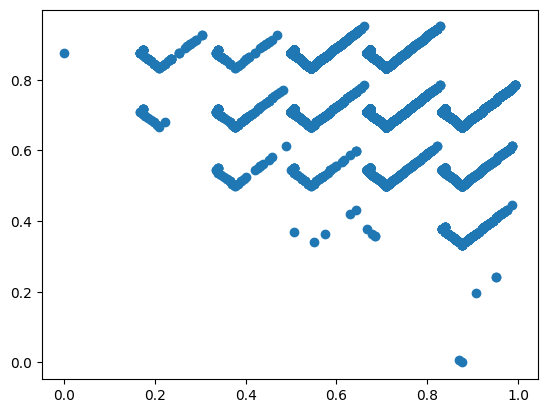

In [9]:
plt.scatter(distance_matrix[:,0], distance_matrix[:,1])

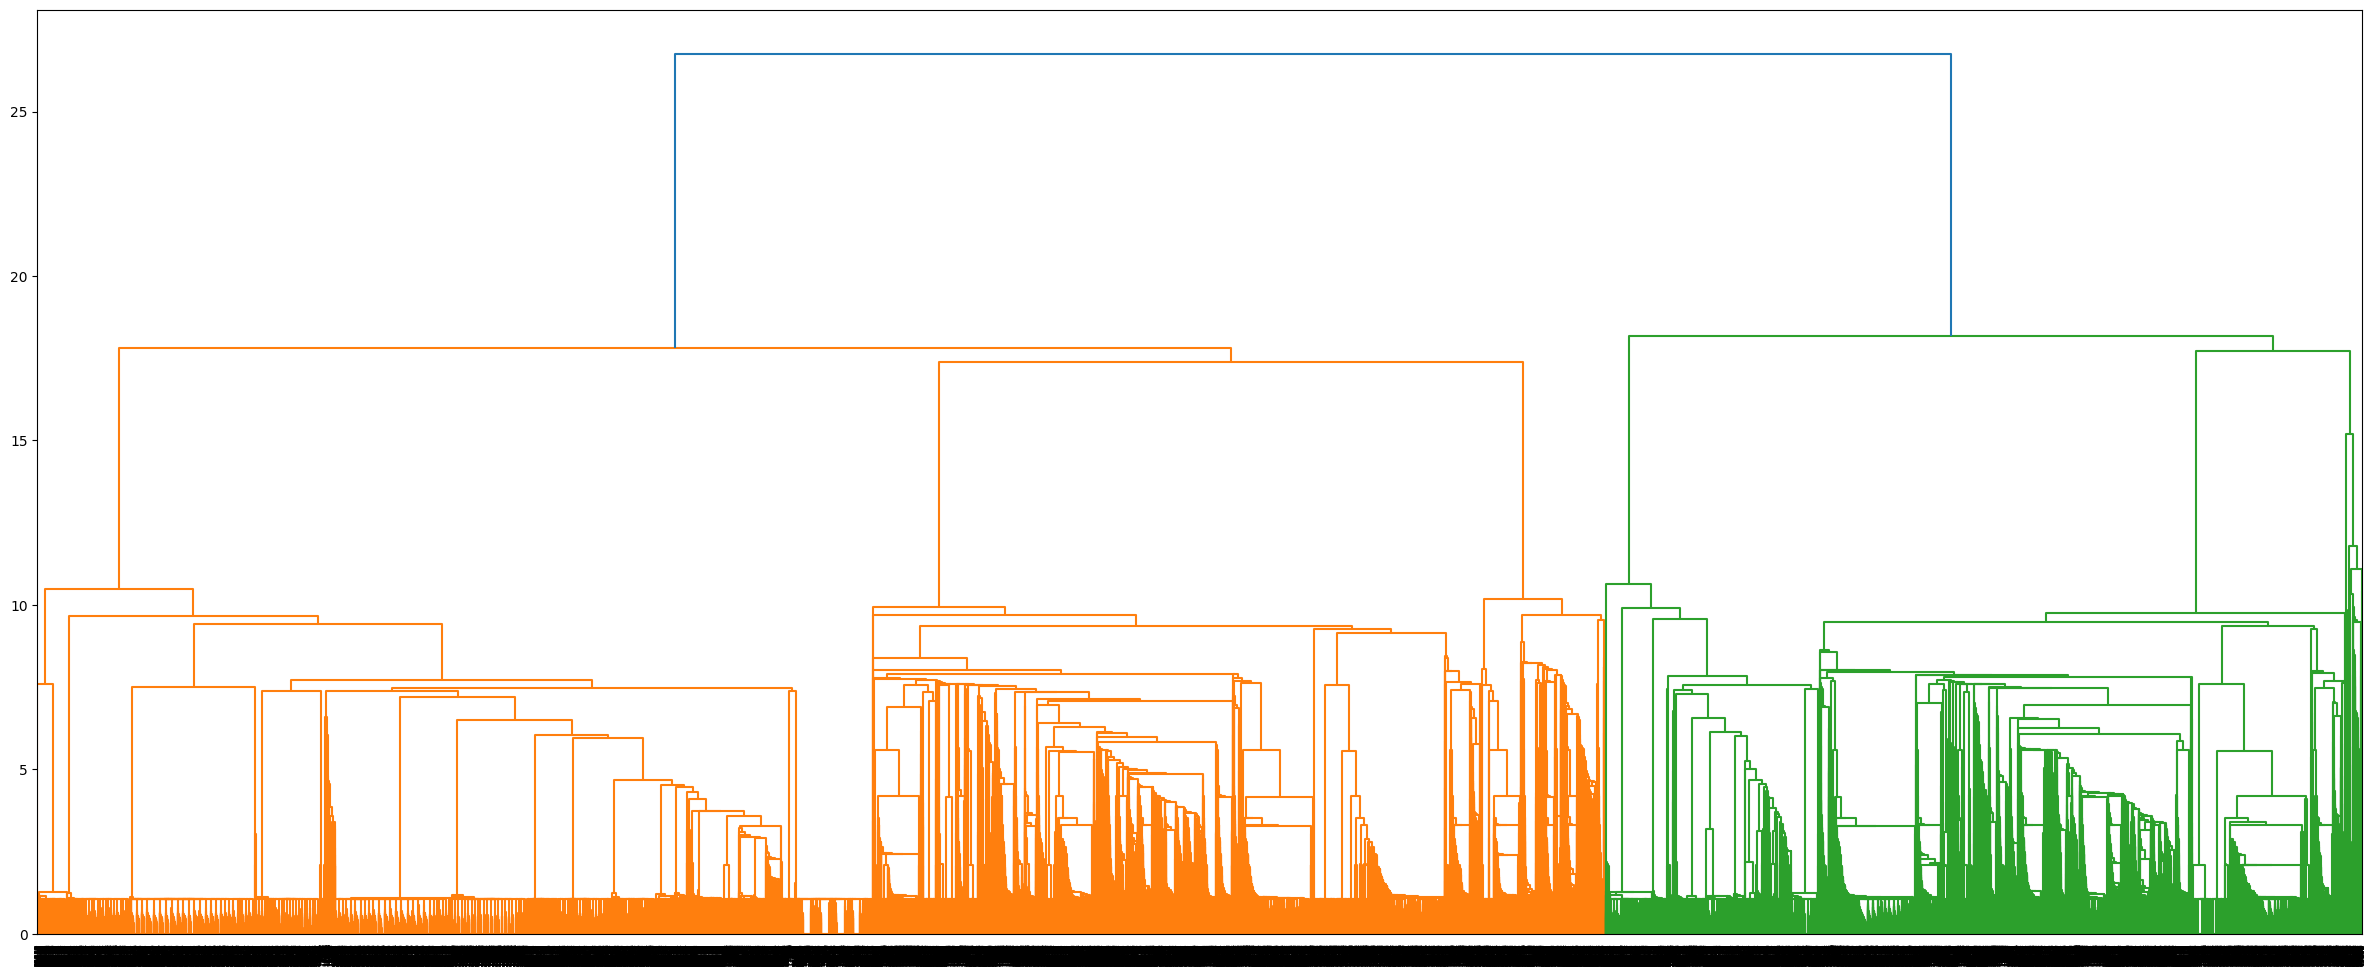

In [10]:
clusters_single = linkage(distance_matrix, "single")
plt.figure(figsize=(30,12))
dendrogram(clusters_single)
plt.show()

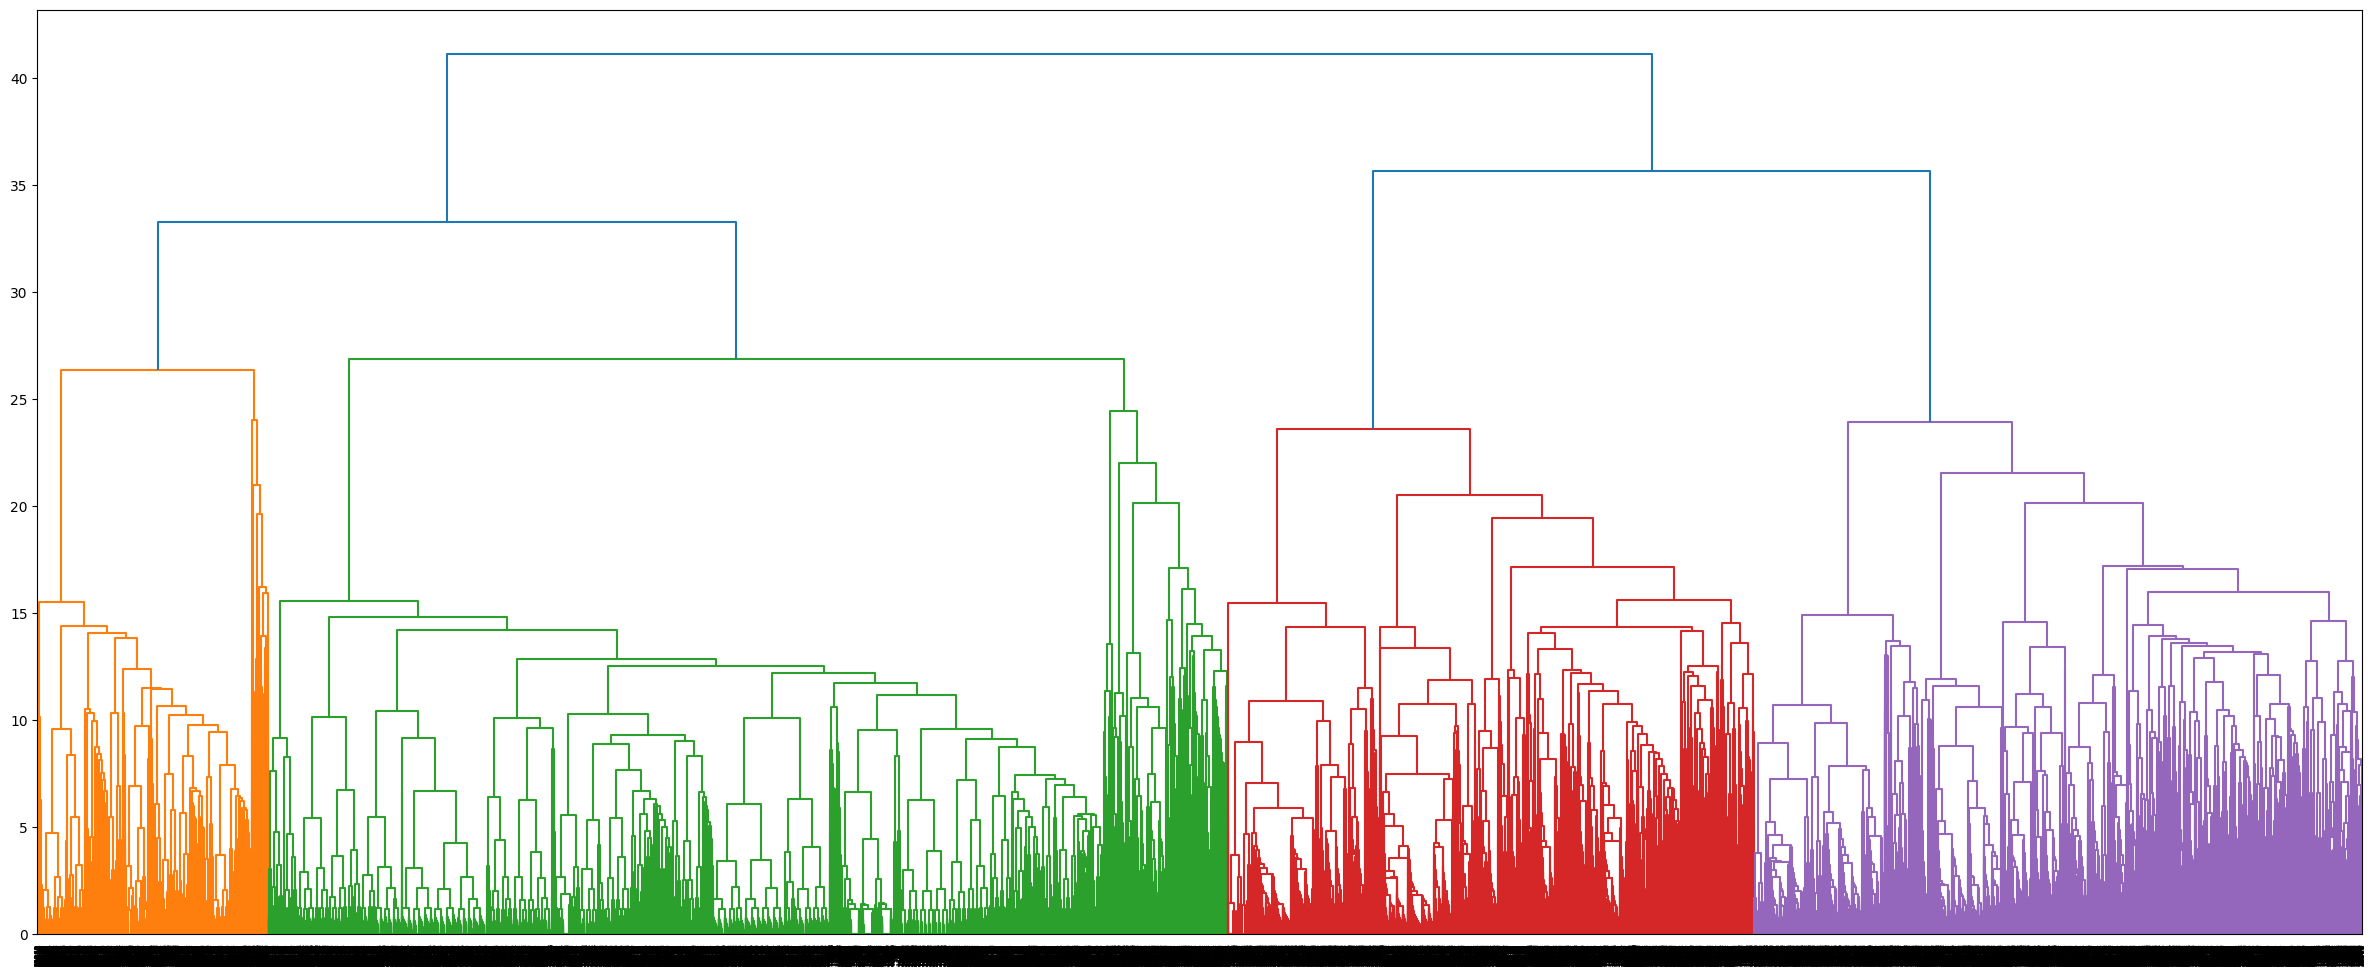

In [11]:
clusters_avg = linkage(distance_matrix, "average")
plt.figure(figsize=(30,12))
dendrogram(clusters_avg)
plt.show()

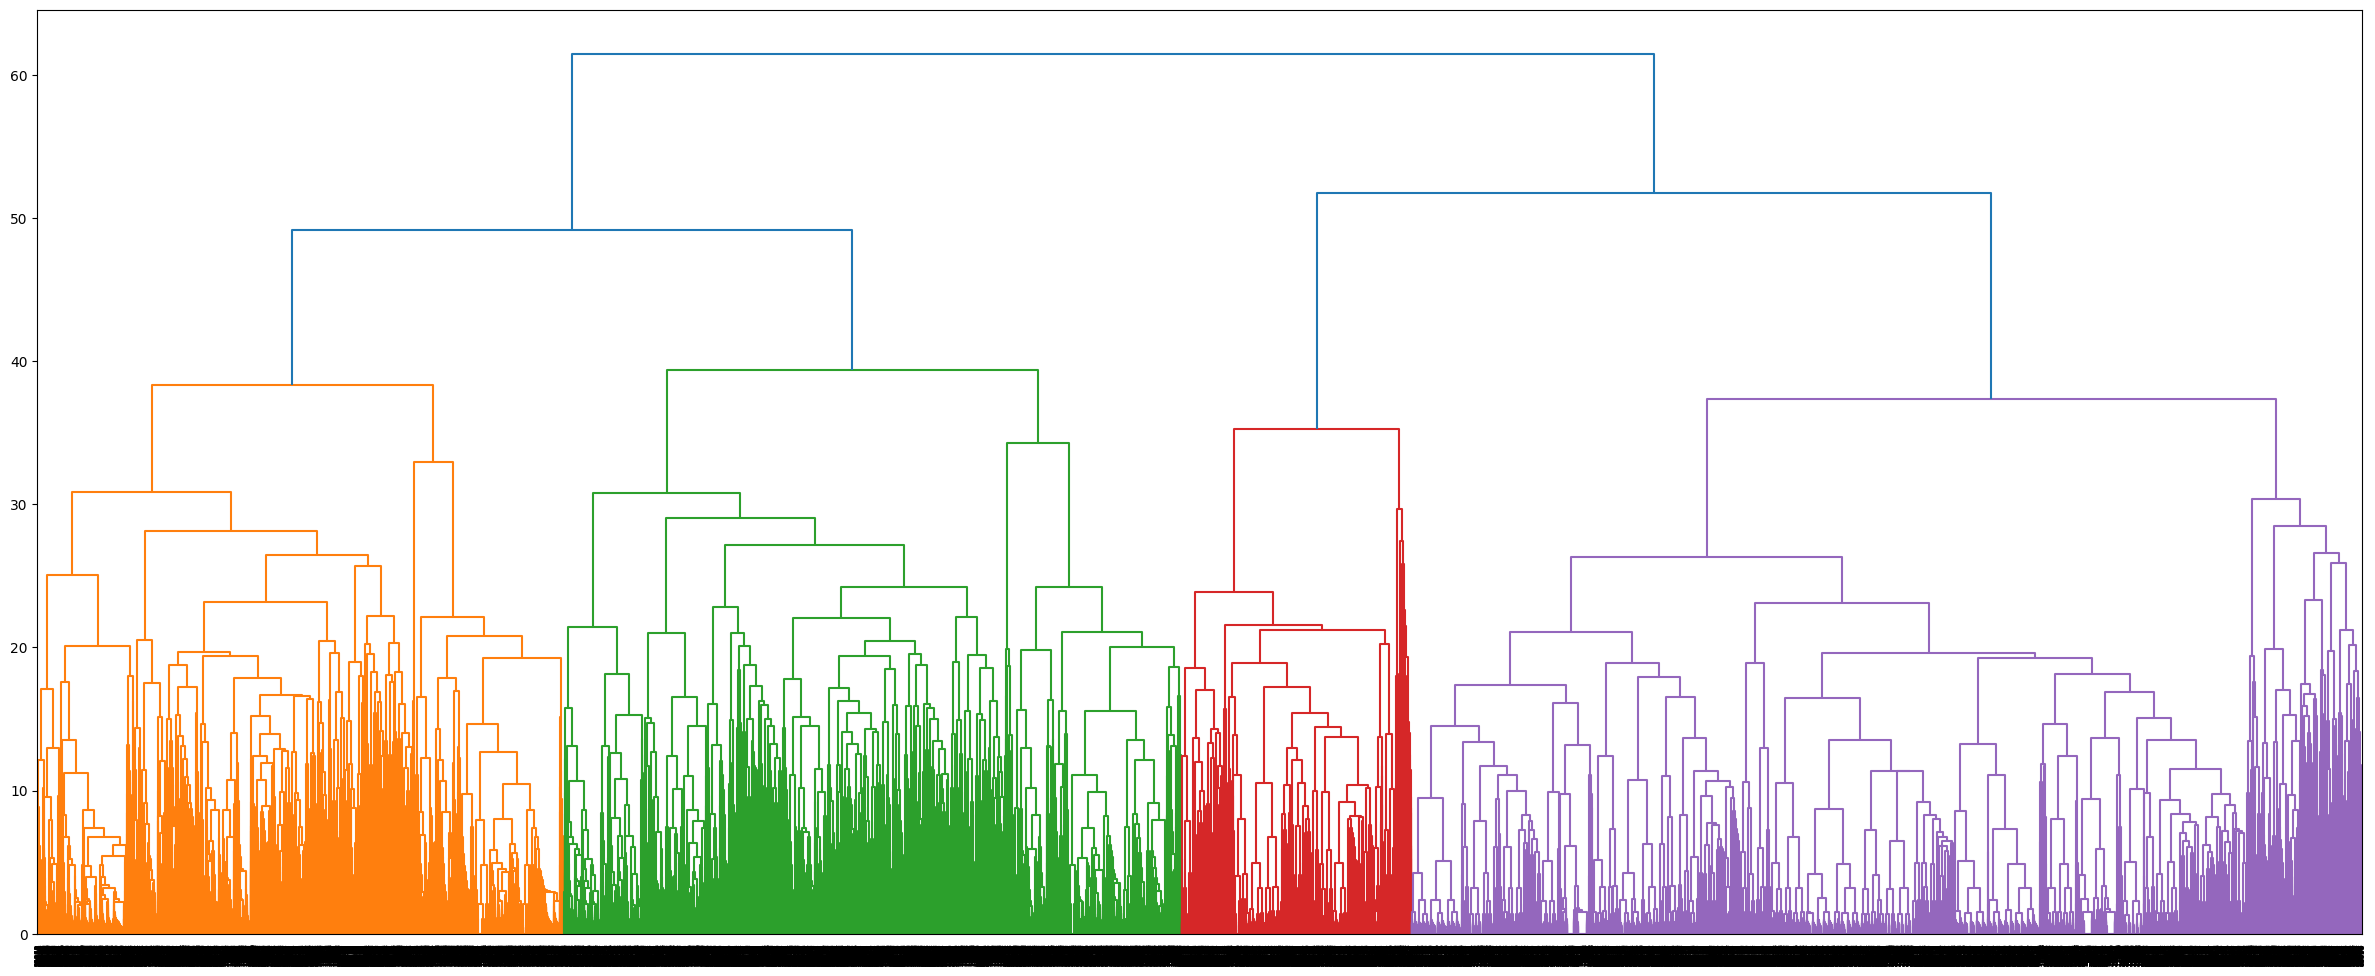

In [12]:
clusters_cmpt = linkage(distance_matrix, "complete")
plt.figure(figsize=(30,12))
dendrogram(clusters_cmpt)
plt.show()

# Single Linkage

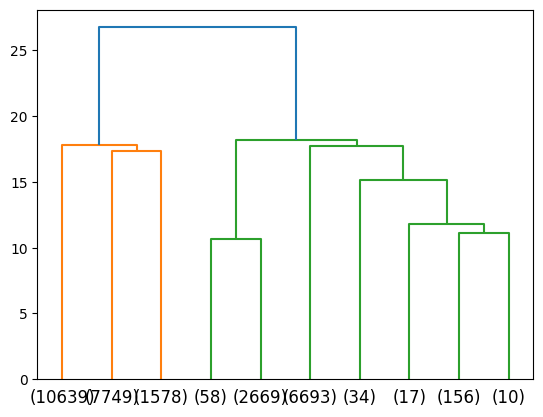

In [14]:
dendrogram(clusters_single, truncate_mode='lastp', p=10)
plt.show()

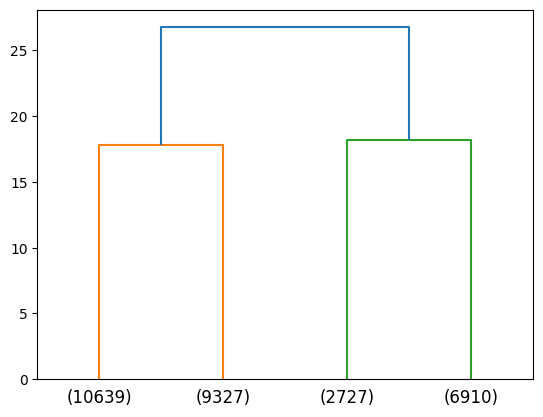

In [15]:
dendrogram(clusters_single, truncate_mode='lastp', p=4)
plt.show()

# Average Linkage 

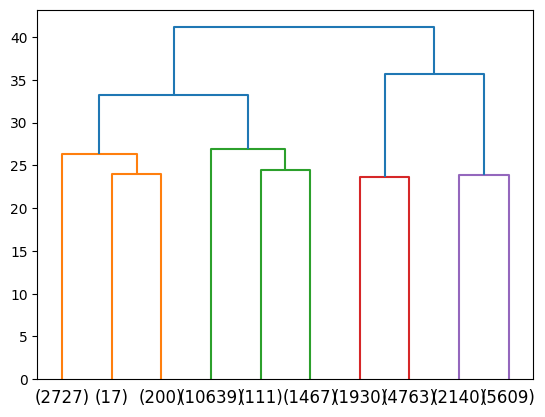

In [16]:
dendrogram(clusters_avg, truncate_mode='lastp', p=10)
plt.show()

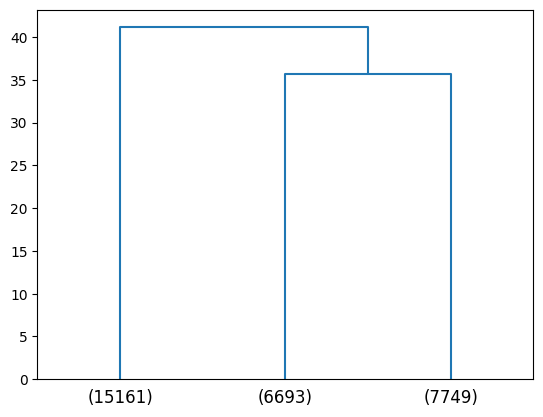

In [17]:
dendrogram(clusters_avg, truncate_mode='lastp', p=3)
plt.show()

# Complete Linkage

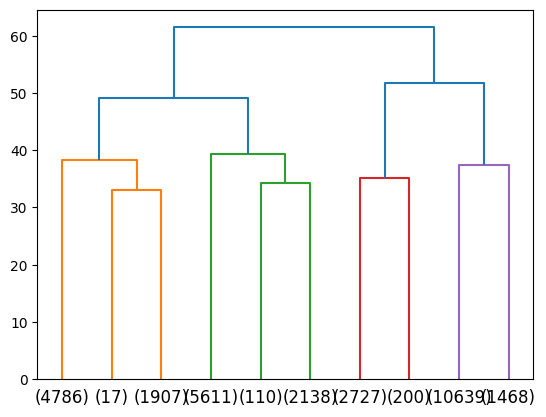

In [18]:
dendrogram(clusters_cmpt, truncate_mode='lastp', p=10)
plt.show()

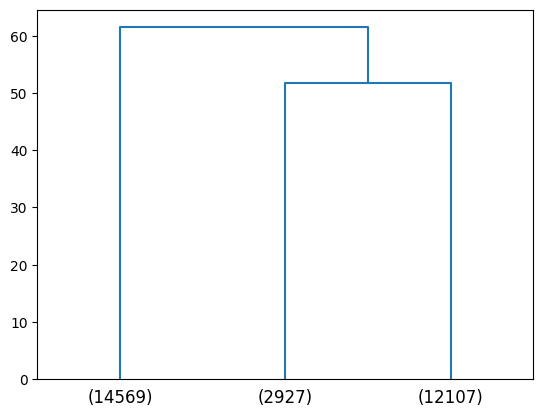

In [19]:
dendrogram(clusters_cmpt, truncate_mode='lastp', p=3)
plt.show()

In [20]:
from scipy.cluster.hierarchy import fcluster

hier_clusters = fcluster(clusters_cmpt, 50, criterion='distance')
len(set(hier_clusters))

3

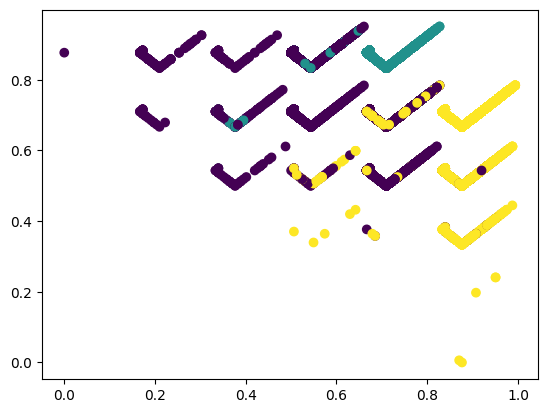

In [21]:
plt.scatter(distance_matrix[:,0], distance_matrix[:,1], c=hier_clusters)

In [22]:
from scipy.cluster.hierarchy import cut_tree 

cluster_labels = cut_tree(clusters_cmpt, n_clusters=3).reshape(-1, )
submuestra["cluster"] = cluster_labels

In [23]:
submuestra["cluster"].value_counts()

cluster
0    14569
1    12107
2     2927
Name: count, dtype: int64

In [24]:
submuestra.head()

,estado,sexo,vivo_o_muerto,estado_localizado,edad,dias_busqueda,cluster
0,colima,femenino,vivo,colima,19.0,"36 days, 0:00:00",0
1,tlaxcala,masculino,muerto,tlaxcala,26.0,0:00:00,1
2,colima,femenino,vivo,colima,18.0,"545 days, 0:00:00",0
3,colima,masculino,aun_sin_localizar,no_especificado,34.0,NaN,1
4,colima,masculino,aun_sin_localizar,no_especificado,21.0,NaN,1


In [25]:
submuestra.to_csv('mayores_18_clustered.csv', index=False)